In [1]:
# Data - 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# Source: https://github.com/CSSEGISandData/COVID-19 

In [2]:
# Data From https://www.kaggle.com/imdevskp/corona-virus-report
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import moviepy.editor as mp
from IPython.display import Video

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[~world.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]
#PATH = "C:/py/covid19/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
path = 'C:/py/covid19/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/'

file = '03-28-2020.csv'

df = pd.read_csv(url+file)
df.head()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-28 23:05:37,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-28 23:05:37,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-28 23:05:37,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-28 23:05:37,43.452658,-116.241552,76,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-28 23:05:37,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [3]:
# Rank countries by category (confirmed, deaths, recovered)
def plot_rank(col, limit, color):
    df_countries = df.groupby('Country_Region').sum()
    df_countries['Active'] = df_countries['Confirmed'] - df_countries['Recovered'] - df_countries['Deaths']
    
    fig, ax = plt.subplots(1, figsize=(16,8))

    rank = df_countries.sort_values(col, ascending=False)
    rank[:limit].sort_values(col).plot(y=col, kind='barh', ax=ax, color=color)

    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(col)
    plt.show()
    
# plot 20 countries with the most confirmed cases 
# and their number of confimed, active, and deaths
def plot_day(df, i):
    try:
        df_countries = df.groupby('Country_Region').sum()
    except:
        df_countries = df.groupby('Country/Region').sum()
    
    df_countries['Active'] = df_countries['Confirmed'] - df_countries['Recovered'] - df_countries['Deaths']

    fig, ax = plt.subplots(1, figsize=(16,8))

    rank = df_countries.sort_values('Confirmed', ascending=False)[:20].sort_values('Confirmed', ascending=True)

    rank.plot(y='Deaths', kind='barh', ax=ax, color='grey')

    rank.plot(y='Recovered', kind='barh', ax=ax, color='lightblue', left = rank['Deaths'])

    rank.plot(y='Active', kind='barh', ax=ax, color='orangered', left = (rank['Deaths']+rank['Recovered']))

    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'x')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(i[:10] + ' | ' + '{:,d}'.format(df['Confirmed'].sum()) +' CONFIRMED CASES')
    plt.savefig('pics/'+i+'.png', facecolor='white', edgecolor='none')
    
# plot map of active confirmed and recovered    
def plot_map(df, i):
    fig, ax = plt.subplots(1, figsize=(40,24))

    # plot map
    world.plot(ax=ax, color='black')
    
    try:
        # plot infected locations
        df.plot(kind='scatter', x='Long_', y='Lat', ax=ax, color='orangered', 
                s=pd.to_numeric(df['Confirmed'], errors='coerce')/50)

        df.plot(kind='scatter', x='Long_', y='Lat', ax=ax, color='lightblue', 
                s=pd.to_numeric(df['Recovered'], errors='coerce')/50)
    except:
        # plot infected locations
        df.plot(kind='scatter', x='Longitude', y='Latitude', ax=ax, color='orangered', 
                s=pd.to_numeric(df['Confirmed'], errors='coerce')/50)

        df.plot(kind='scatter', x='Longitude', y='Latitude', ax=ax, color='lightblue', 
                s=pd.to_numeric(df['Recovered'], errors='coerce')/50)

    plt.text(0, 100, i[:10], color = 'black', fontsize = 40, ha='center')
    
    plt.text(0, -60, '{:,d}'.format(df['Confirmed'].sum()), 
             color = 'white', fontsize = 50, ha='center')
    
    plt.text(0, -50, 'confirmed', 
             color = 'white', fontsize = 25, ha='center')
    
    # hide map axis
    ax.axis('off')
    ax.legend(['Confirmed','Recovered'], fontsize = 28)
    plt.savefig('pics/'+i+'.png', facecolor='grey', edgecolor='none')

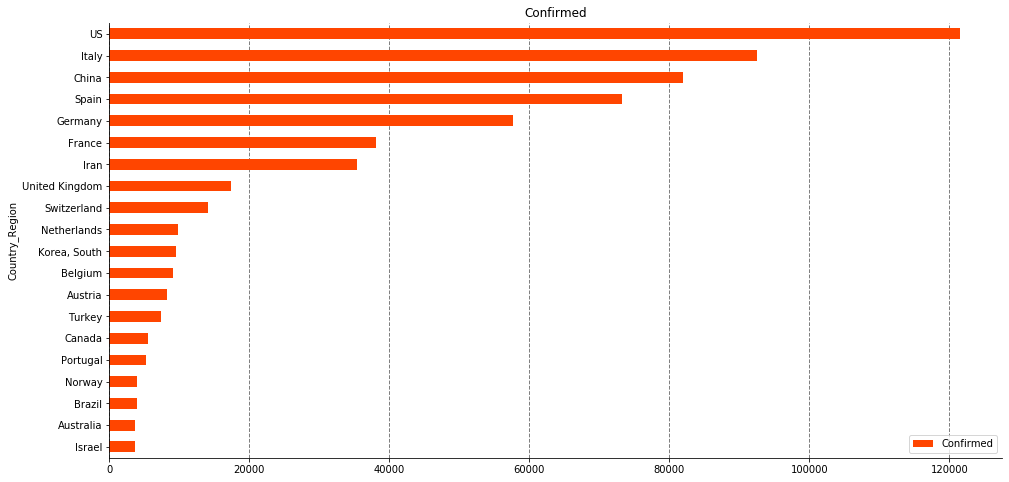

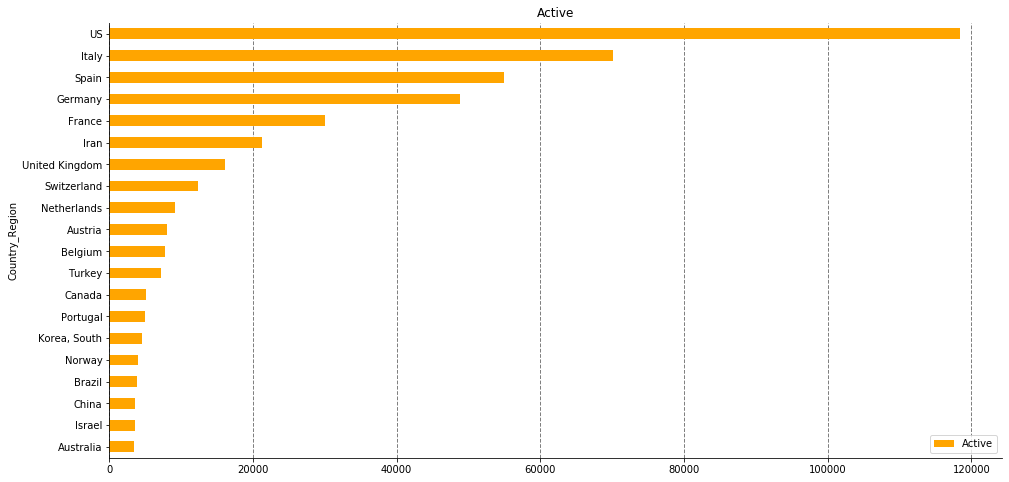

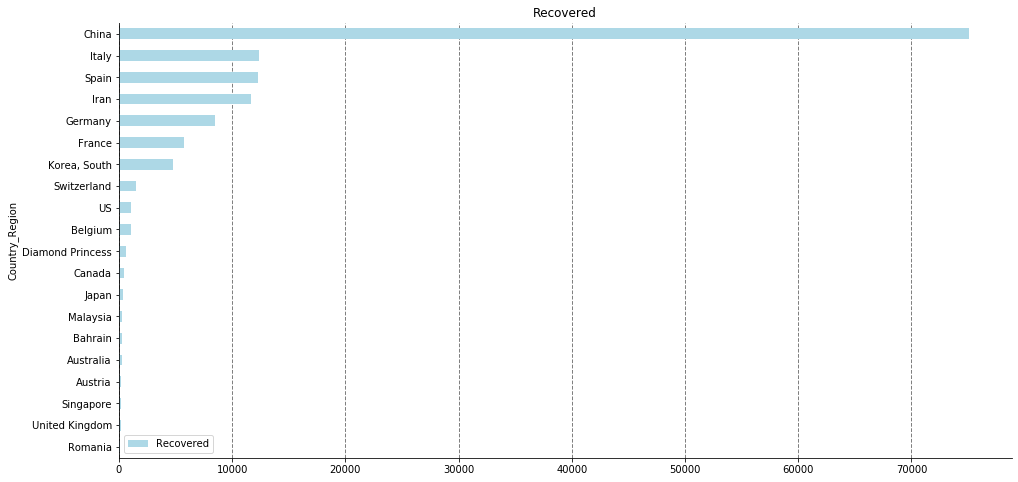

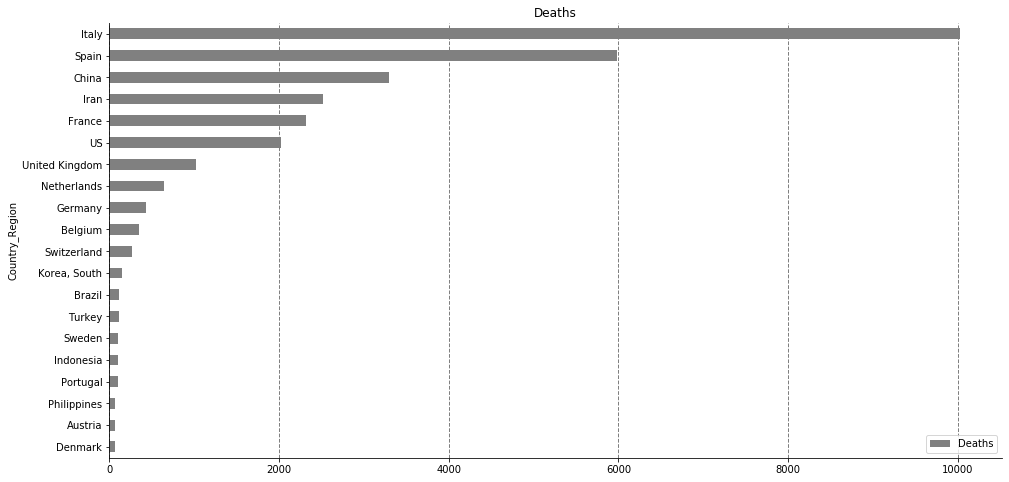

In [4]:
plot_rank('Confirmed', 20, 'orangered')
plot_rank('Active', 20, 'orange')
plot_rank('Recovered', 20, 'lightblue')
plot_rank('Deaths', 20, 'grey')

# TIMESERIES

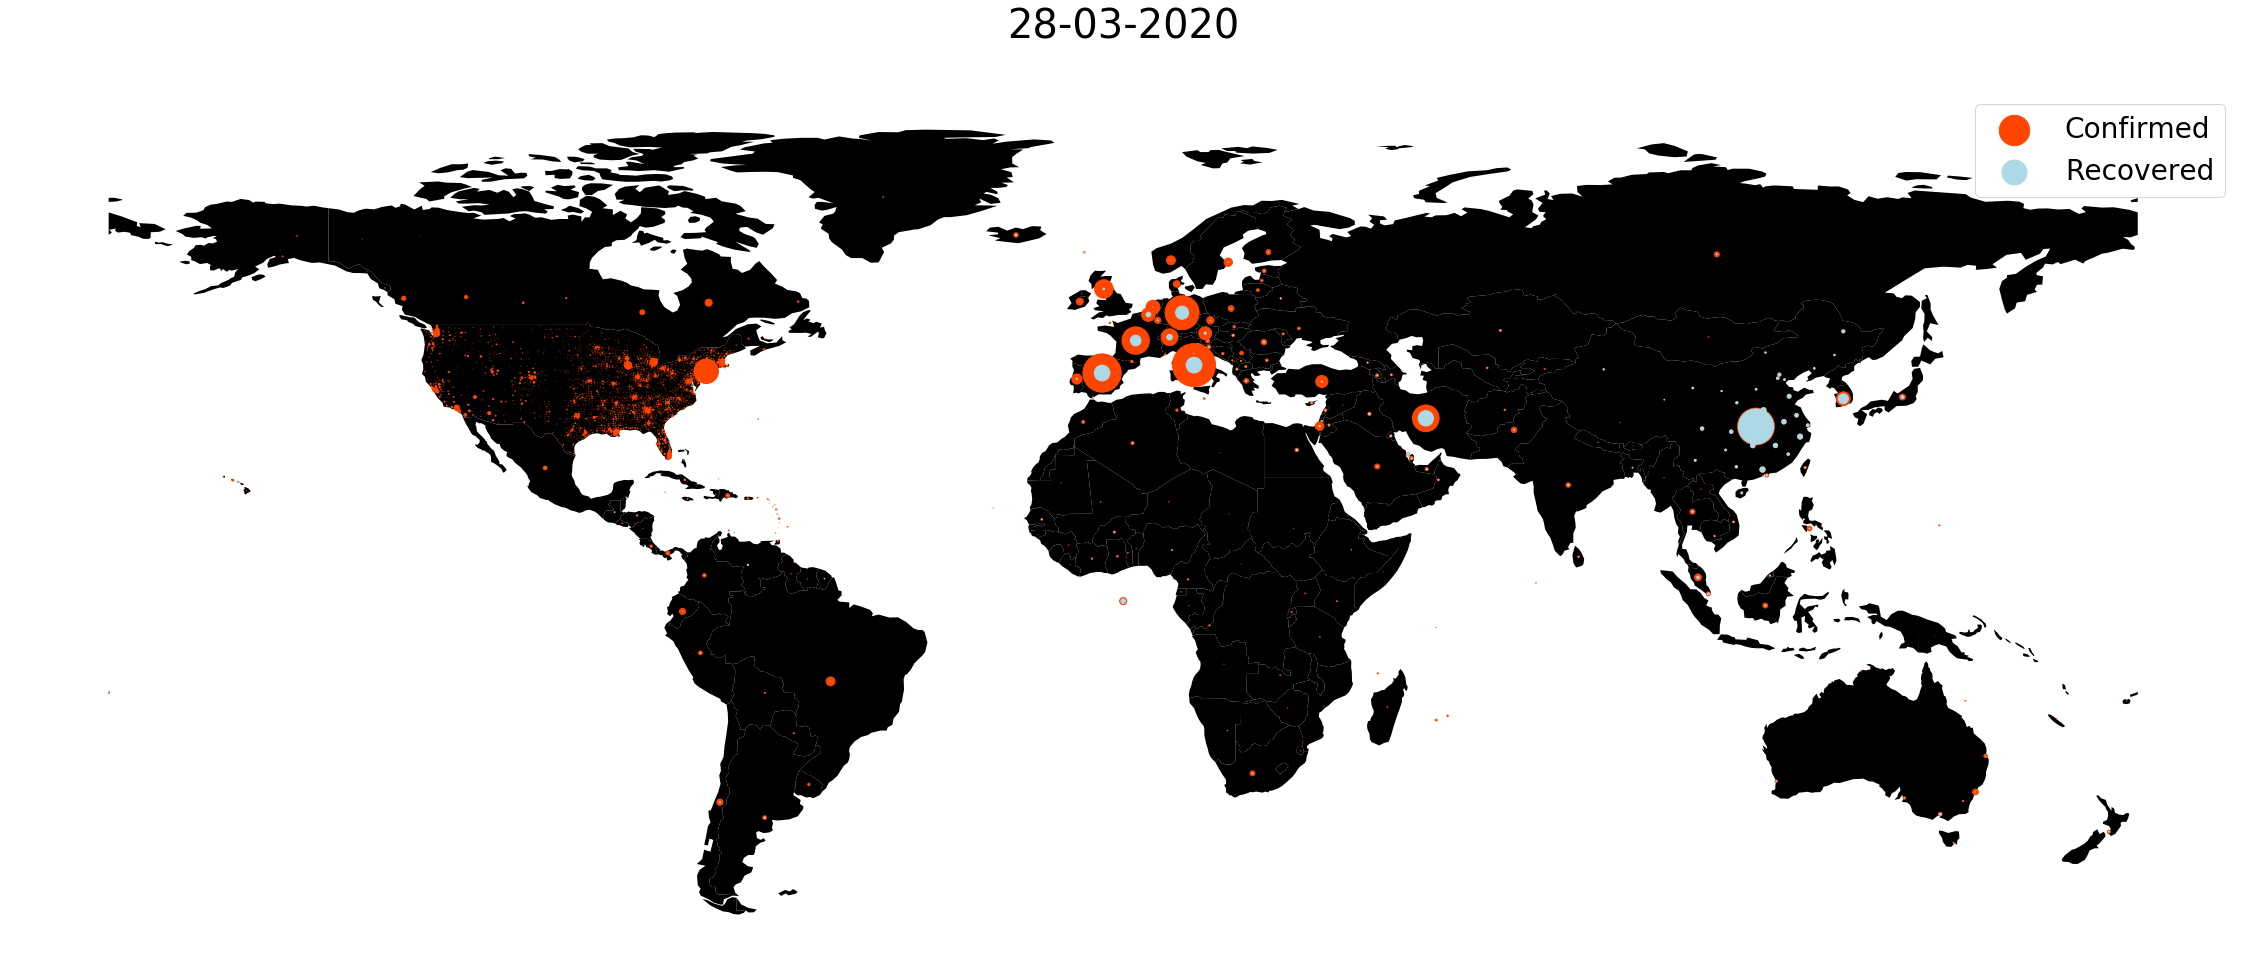

In [5]:
plot_map(df, '28-03-2020')    

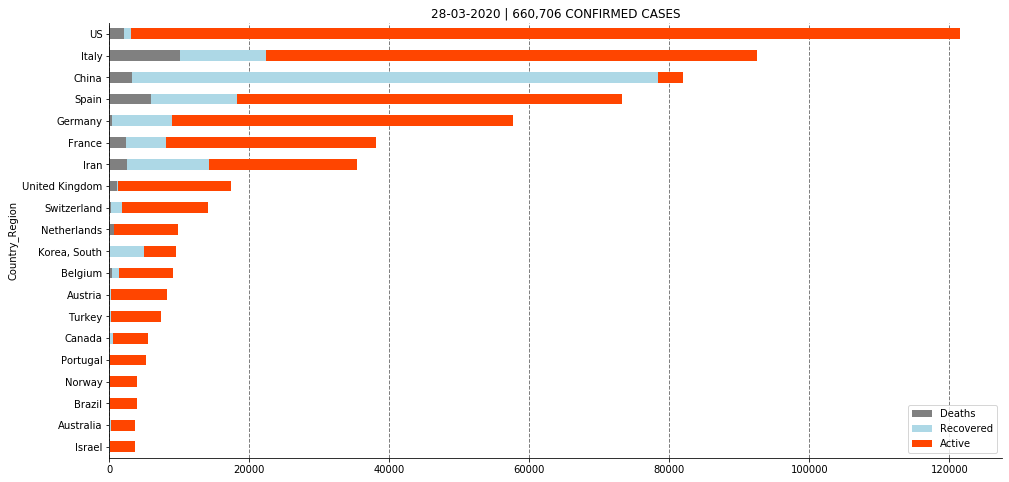

In [6]:
plot_day(df, '28-03-2020')

## Map Timeseries

In [7]:
# create file name range from 03-01-2020 **First update with lat and long
str(pd.date_range(start="03-01-2020",end="28-03-2020").to_list()[0])[:10]

dates = pd.date_range(start="03-01-2020",end="28-03-2020")
files = []

for i in dates.strftime('%m-%d-%Y'):
    files.append(str(i)+'.csv')
    
# create maps
for file in files:
    plot_map(pd.read_csv(path+file), file[:10]+'_map')
    plt.close('all')
    if(files[-1] == file): print('Concluded')

Concluded


In [8]:
# build map video
clip_list = ['pics/'+file[:10]+'_map.png' for file in files]
    
clip = mp.ImageSequenceClip(clip_list, fps=1)
clip.write_videofile("map_timeseries.mp4")

Video("map_timeseries.mp4", width=600, height=360)

Moviepy - Building video map_timeseries.mp4.
Moviepy - Writing video map_timeseries.mp4



Moviepy - Done !
Moviepy - video ready map_timeseries.mp4


## Rank Timeseries

In [9]:
# create file name range from 03-01-2020 **First update with lat and long
str(pd.date_range(start="02-01-2020",end="03-28-2020").to_list()[0])[:10]

dates = pd.date_range(start="02-01-2020",end="03-28-2020")
files = []

for i in dates.strftime('%m-%d-%Y'):
    files.append(str(i)+'.csv')
    
# create maps
for file in files:
    plot_day(pd.read_csv(path+file), file[:10]+'_rank')
    plt.close('all')
    if(files[-1] == file): print('Concluded')

Concluded


In [10]:
# build map video
clip_list = ['pics/'+file[:10]+'_rank.png' for file in files]
    
clip = mp.ImageSequenceClip(clip_list, fps=2)
clip.write_videofile("rank_timeseries.mp4")

Video("rank_timeseries.mp4", width=600, height=360)

Moviepy - Building video rank_timeseries.mp4.
Moviepy - Writing video rank_timeseries.mp4



Moviepy - Done !
Moviepy - video ready rank_timeseries.mp4


In [11]:
plt.close('all')